In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('~/Downloads/HRDataset_v14.csv', index_col='EmpID')

df.head()

Employee_Name  MarriedID  MaritalStatusID  GenderID  \
EmpID                                                                   
10026       Adinolfi, Wilson  K          0                0         1   
10084  Ait Sidi, Karthikeyan             1                1         1   
10196         Akinkuolie, Sarah          1                1         0   
10088              Alagbe,Trina          1                1         0   
10069          Anderson, Carol           0                2         0   

       EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  \
EmpID                                                                     
10026            1       5            4                       0   62506   
10084            5       3            3                       0  104437   
10196            5       5            3                       0   64955   
10088            1       5            3                       0   64991   
10069            5       5            3                       0   50825   

       Termd   ...        ManagerName ManagerID RecruitmentSource  \
EmpID          ...                                                  
10026      0   ...     Michael Albert      22.0          LinkedIn   
10084      1   ...         Simon Roup       4.0            Indeed   
10196      1   ...     Kissy Sullivan      20.0          LinkedIn   
10088      0   ...       Elijiah Gray      16.0            Indeed   
10069      1   ...     Webster Butler      39.0     Google Search   

       PerformanceScore EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
EmpID                                                                           
10026           Exceeds             4.60               5                    0   
10084       Fully Meets             4.96               3                    6   
10196       Fully Meets             3.02               3                    0   
10088       Fully Meets             4.84               5                    0   
10069       Fully Meets             5.00               4                    0   

      LastPerformanceReview_Date DaysLateLast30 Absences  
EmpID                                                     
10026                  1/17/2019              0        1  
10084                  2/24/2016              0       17  
10196                  5/15/2012              0        3  
10088                   1/3/2019              0       15  
10069                   2/1/2016              0        2  

[5 rows x 35 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
Employee_Name                 311 non-null object
MarriedID                     311 non-null int64
MaritalStatusID               311 non-null int64
GenderID                      311 non-null int64
EmpStatusID                   311 non-null int64
DeptID                        311 non-null int64
PerfScoreID                   311 non-null int64
FromDiversityJobFairID        311 non-null int64
Salary                        311 non-null int64
Termd                         311 non-null int64
PositionID                    311 non-null int64
Position                      311 non-null object
State                         311 non-null object
Zip                           311 non-null int64
DOB                           311 non-null object
Sex                           311 non-null object
MaritalDesc                   311 non-null object
CitizenDesc                   311 non-null object


In [12]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [13]:
salary_dept_mean=df.groupby('Department')['Salary'].mean()
salary_dept_mean=salary_dept_mean.sort_values();salary_dept_mean


Department
Production               59953.545455
Sales                    69061.258065
Admin Offices            71791.888889
Software Engineering     94989.454545
IT/IS                    97064.640000
Executive Office        250000.000000
Name: Salary, dtype: float64

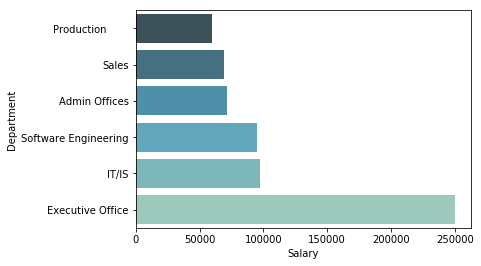

In [14]:
pd.DataFrame(salary_dept_mean)
ax = sns.barplot(y=salary_dept_mean.index,x=salary_dept_mean,palette='GnBu_d')


In [15]:
df[df['Department']=='Executive Office']['Position']

EmpID
10089    President & CEO
Name: Position, dtype: object

### While it appears that "Employees" of the executive office have the highest salaries, this is misleading as there is just one employee in the executive office and it is the President/CEO. 
### Among the other departments , employees of the Software Engineering and IT/IS departments have the highest average pay.

# Diversity Profile

RaceDesc
Hispanic                              1
American Indian or Alaska Native      3
Two or more races                    11
Asian                                29
Black or African American            80
White                               187
Name: Employee_Name, dtype: int64


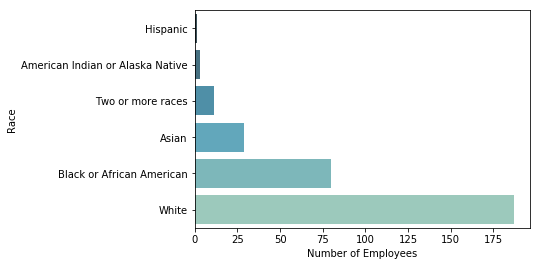

In [16]:
diversity_counts=df.groupby('RaceDesc')['Employee_Name'].count()
diversity_counts=diversity_counts.sort_values();
print(diversity_counts)

ax = sns.barplot(y=diversity_counts.index,x=diversity_counts,palette='GnBu_d')
ax.set(xlabel='Number of Employees', ylabel='Race')
plt.show()

### This paints a troubling picture as there is just a single employee identifying as Hispanic, but a closer look at the 'HispanicLatino' column reveals a more nuanced situation.

In [17]:
df[df['HispanicLatino']=='Yes']['HispanicLatino'].count()

27

### Even though there is only one person whose Race description is 'Hispanic', we see that 27 employees identify as Hispanic or Latino. 

### Now let us see the mean salary of employees by race

RaceDesc
Two or more races                   59998.181818
American Indian or Alaska Native    65806.000000
White                               67287.545455
Asian                               68521.206897
Black or African American           74431.025000
Hispanic                            83667.000000
Name: Salary, dtype: float64


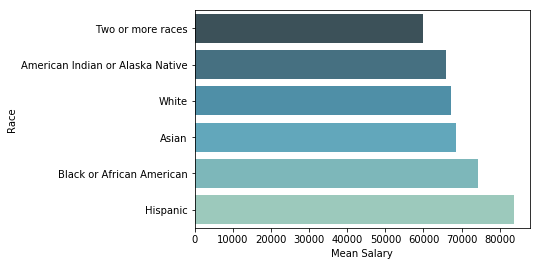

In [18]:
salary_race_mean=df.groupby('RaceDesc')['Salary'].mean()
salary_race_mean=salary_race_mean.sort_values();
print(salary_race_mean)

ax = sns.barplot(y=salary_race_mean.index,x=salary_race_mean,palette='GnBu_d')
ax.set(xlabel='Mean Salary', ylabel='Race')
plt.show()

# Relationship between a person who works for and their perfomance score

In [37]:
Manager_perf = df.groupby( ['ManagerName', 'Sex'])['PerfScoreID'].agg(['mean', 'median', 'min', 'max', 'count'])
print(Manager_perf)

                            mean  median  min  max  count
ManagerName        Sex                                   
Alex Sweetwater    F    2.833333       3    2    3      6
                   M    3.666667       4    3    4      3
Amy Dunn           F    3.153846       3    2    4     13
                   M    2.500000       3    1    3      8
Board of Directors F    3.000000       3    3    3      2
Brandon R. LeBlanc F    3.000000       3    3    3      5
                   M    3.000000       3    3    3      2
Brannon Miller     F    2.846154       3    1    4     13
                   M    2.777778       3    1    4      9
Brian Champaigne   F    3.000000       3    3    3      3
                   M    3.000000       3    3    3      5
David Stanley      F    3.000000       3    2    4     14
                   M    3.000000       3    3    3      7
Debra Houlihan     F    3.000000       3    3    3      2
                   M    2.000000       2    2    2      1
Elijiah Gray  

### In most of the cases, the mean of the perfomance score with the relationship of Manager doesn't depend on the Gender. Only the employees who work for Managers Alex Sweetwater, Amy Dunn, Webster Butler have quite a difference in the Perfomance Score based on the gender. 

ManagerName
Debra Houlihan        2.666667
John Smith            2.714286
Brannon Miller        2.818182
Peter Monroe          2.857143
Michael Albert        2.863636
Amy Dunn              2.904762
Kissy Sullivan        2.954545
Webster Butler        3.000000
Board of Directors    3.000000
Brandon R. LeBlanc    3.000000
Brian Champaigne      3.000000
David Stanley         3.000000
Elijiah Gray          3.000000
Lynn Daneault         3.000000
Ketsia Liebig         3.047619
Kelley Spirea         3.090909
Janet King            3.105263
Alex Sweetwater       3.111111
Simon Roup            3.117647
Jennifer Zamora       3.142857
Eric Dougall          3.250000
Name: PerfScoreID, dtype: float64


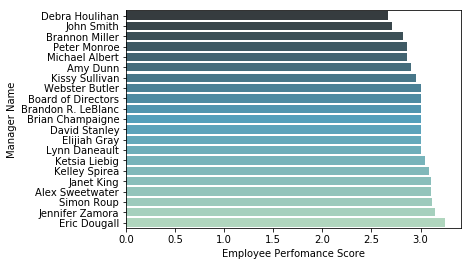

In [66]:
Manager_perf_mean = df.groupby('ManagerName')['PerfScoreID'].mean()
Manager_perf_mean = Manager_perf_mean.sort_values()
print(Manager_perf_mean)

ax = sns.barplot(y=Manager_perf_mean.index,x=Manager_perf_mean, palette='GnBu_d')
ax.set(xlabel='Employee Perfomance Score', ylabel='Manager Name')
plt.show()

#### Therefore, It is clear that the Employee Perfomance Score depends on Manager.

# Best recruiting sources to ensure a diverse organization

In [65]:
df.RecruitmentSource.value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

RecruitmentSource        RaceDesc                        
CareerBuilder            Asian                                2
                         Black or African American            5
                         White                               16
Diversity Job Fair       Black or African American           29
Employee Referral        Asian                                1
                         Black or African American            5
                         White                               25
Google Search            American Indian or Alaska Native     1
                         Asian                                7
                         Black or African American            4
                         Two or more races                    2
                         White                               35
Indeed                   American Indian or Alaska Native     1
                         Asian                               10
                         Black or African Amer

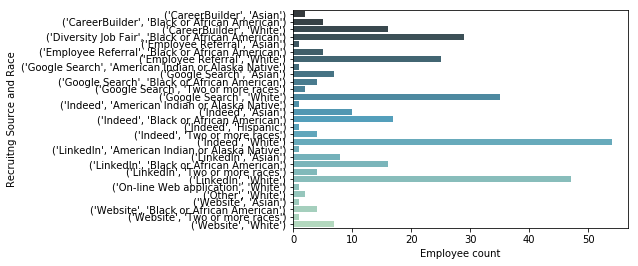

In [103]:
div_count = df.groupby(['RecruitmentSource','RaceDesc'])['Employee_Name'].count()
print(div_count)
#div_count = div_count.sort_values()
#div_percent = div_count.groupby(level=0).apply(lambda x:
                                                 #100 * x / float(x.sum()))
#print(div_percent)

ax = sns.barplot(y=div_count.index,x=div_count, palette='GnBu_d')
ax.set(ylabel='Recruitng Source and Race', xlabel='Employee count')
plt.show()



#### Through Indeed and LinkedIn are the two recruiting sources have different Races recruited.

RecruitmentSource        Sex
CareerBuilder            F      16
                         M       7
Diversity Job Fair       F      15
                         M      14
Employee Referral        F      11
                         M      20
Google Search            F      33
                         M      16
Indeed                   F      50
                         M      37
LinkedIn                 F      44
                         M      32
On-line Web application  M       1
Other                    F       1
                         M       1
Website                  F       6
                         M       7
Name: Employee_Name, dtype: int64


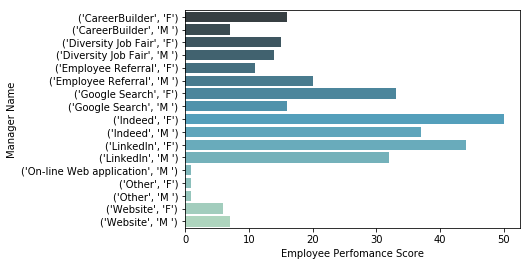

In [99]:
div_count2 = df.groupby(['RecruitmentSource', 'Sex'])['Employee_Name'].count()
print(div_count2)

ax = sns.barplot(y=div_count2.index,x=div_count2, palette='GnBu_d')
ax.set(xlabel='Employee Count', ylabel='Recruitment Source and Gender')
plt.show()

#### It is clear that the number of women hired is clearly greater than the number of men except through Employee Referal, Website and Online Web Application.

# Let us predict who is going to terminate and who isn't

PerfScoreID  TermReason                      
1            Another position                      1
             N/A-StillEmployed                     9
             career change                         1
             performance                           1
             unhappy                               1
2            N/A-StillEmployed                     8
             attendance                            3
             career change                         2
             military                              1
             no-call, no-show                      1
             performance                           1
             unhappy                               2
3            Another position                     17
             Fatal attraction                      1
             Learned that he is a gangster         1
             N/A-StillEmployed                   161
             attendance                            4
             career change                         6


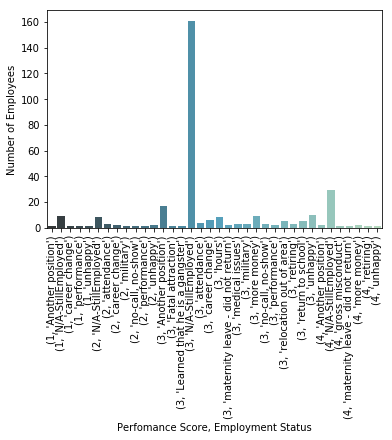

In [154]:
perf_Term = df.groupby(['PerfScoreID', 'TermReason'])['TermReason'].count()

print(perf_Term)

ax = sns.barplot(x=perf_Term.index,y=perf_Term, palette='GnBu_d')
plt.xticks(rotation = 'vertical')
ax.set(xlabel='Perfomance Score, Employment Status', ylabel='Number of Employees')
plt.show()

#### The employees with high perfomance score of 3 and 4 have the least probability of getting terminated. So, the employees with perfomance score 1, 2 have high probability to be terminated.

PerfScoreID  Sex  TermReason                      
1            F    Another position                     1
                  N/A-StillEmployed                    3
                  performance                          1
             M    N/A-StillEmployed                    6
                  career change                        1
                  unhappy                              1
2            F    N/A-StillEmployed                    4
                  attendance                           2
                  career change                        1
                  no-call, no-show                     1
                  unhappy                              1
             M    N/A-StillEmployed                    4
                  attendance                           1
                  career change                        1
                  military                             1
                  performance                          1
                  unhappy            

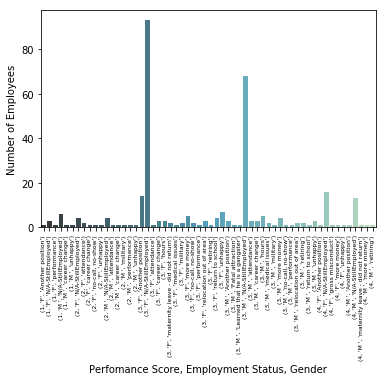

In [155]:
perf_gender = df.groupby(['PerfScoreID', 'Sex', 'TermReason'])['TermReason'].count()
#perf_gender = (perf_gend*100/(len(df.index)))
print(perf_gender)


ax = sns.barplot(x=perf_gender.index,y=perf_gender, palette='GnBu_d')
plt.xticks(rotation = 'vertical', size = 6)
ax.set(xlabel='Perfomance Score, Employment Status, Gender', ylabel='Number of Employees')
plt.show()


TermReason                        Sex
Another position                  F       5.144695
                                  M       1.286174
Fatal attraction                  M       0.321543
Learned that he is a gangster     M       0.321543
N/A-StillEmployed                 F      37.299035
                                  M      29.260450
attendance                        F       0.964630
                                  M       1.286174
career change                     F       1.286174
                                  M       1.607717
gross misconduct                  F       0.321543
hours                             F       0.964630
                                  M       1.607717
maternity leave - did not return  F       0.643087
                                  M       0.321543
medical issues                    F       0.321543
                                  M       0.643087
military                          F       0.643087
                                  M       0.

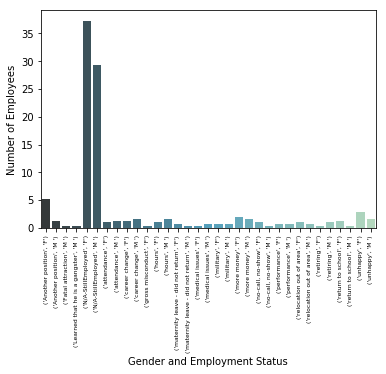

In [156]:
Gen_Term = df.groupby(['TermReason', 'Sex'])['TermReason'].count()
Gen_Termp = (Gen_Term*100 / len(df.index))
print(Gen_Termp)

ax = sns.barplot(x=Gen_Termp.index,y=Gen_Termp, palette='GnBu_d')
plt.xticks(rotation = 'vertical', size = 6)
ax.set(xlabel='Gender and Employment Status', ylabel='Number of Employees')
plt.show()



#### The number of women being terminated is less than the number of men being terminated.